# **Heart Disease Project**

Author Name: [Adnan Hyder](https://www.kaggle.com/adnananalytics)\
Date: 20 Feb, 2025\
Dataset: [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## **About Dataset / Meta Data**

### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## **Content**
### Column Descriptions:
* 'id' (Unique id for each patient)
* 'age' (Age of the patient in years)
* 'origin' (place of study)
* 'sex' (Male/Female)
* 'cp' chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* 'trestbps' resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* 'chol' (serum cholesterol in mg/dl)
* 'fbs' (if fasting blood sugar > 120 mg/dl)
* 'restecg' (resting electrocardiographic results)
  -- Values [normal, stt abnormality, lv hypertrophy]
* 'thalach' maximum heart rate achieved
* 'exang' exercise-induced angina (True/ False)
* 'oldpeak' ST depression induced by exercise relative to rest
* 'slope' the slope of the peak exercise ST segment
* 'ca' number of major vessels (0-3) colored by fluoroscopy
* 'thal' [normal; fixed defect; reversible defect]
* 'num' the predicted attribute


## **Acknowledgements**

### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# **Aims and Objectives**

1. We will explore the dataset and try to understand the data.

## **Importing Libearies**

We will import the following libraries to get started

In [133]:
# for data handling
import pandas as pd
import numpy as np

# for Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
import optuna
from optuna.samplers import TPESampler

# metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [134]:
df = pd.read_csv('heart_disease_uci.csv')
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


## Exploratory Data Analysis (EDA)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


* There are 920 rows and 16 columns in the dataset.\
* There are 8 numeric column and 8 categorical columns in the dataset.\
* Some missing values are Present in trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, and thal.

In [136]:
df.shape

(920, 16)

In [137]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


* The minimum age of an Heart Disease patient is 28 years and the maximum age is 77 years. The average age of a Heart Disease patient is 54 years.
* The minimum resting blood pressure is 0 Hg and maximum is 200 mm Hg and the average resting blood pressure is 132 mm Hg.\
  **Normal blood pressure: Below 120/80 mmHg** 
* The minimum serum cholesterol is 0 mg/dl and maximum is 603 mg/dl. The average serum cholesterol is 199 mg/dl.\
  **Normal range of serum cholesterol (chol) is less than 200 mg/dL**
* The minimum maximum heart rate achieved is 71 and maximum is 202. The average maximum heart rate achieved is 137.
  Expected Normal Range by Age:
    * 20 years old → ~200 bpm
    * 30 years old → ~190 bpm
    * 40 years old → ~180 bpm
    * 50 years old → ~170 bpm
    * 60 years old → ~160 bpm
    * 70 years old → ~150 bpm

#### Let's see the age column first

In [138]:
# Minimum and maximum age
df['age'].min(), df['age'].max()

(28, 77)

In [139]:
# print the number of patiens whose age is greater than 50
df[df['age'] > 50].shape

(603, 16)

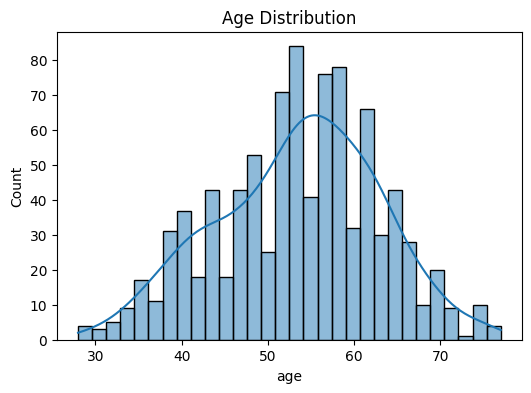

In [140]:
# drwa a histplot of age column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Maximum Heart Disease patients are between 40 to 65 years old.

Mean: 53.51086956521739
Median: 54.0
Mode: 54


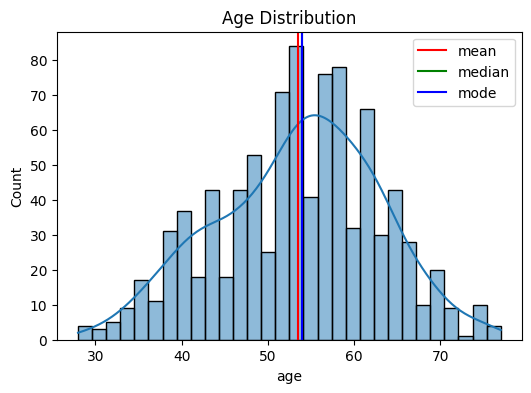

In [141]:
# plot the mean, median and mode of age column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='blue', label='mode')
plt.title('Age Distribution')
plt.legend()

# print the mean, median and mode of the age columns
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's expore the gender based distribution of age column

In [142]:
# histogram of age column using plotly on the basis of gender
fig = px.histogram(df, x='age', color='sex', title='Age Distribution')
fig.show()

In [143]:
# values of sex columns
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [144]:
# value counts of sex column grouped by age
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [145]:
# count the percentage of male and female
male_count = 726
female_count = 194
total_count = 920

# percentage
male_percentage = (726 / 920) * 100
female_percentage = (194 / 920) * 100

print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female percentage in the data: {female_percentage:.2f}%")

Male percentage in the data: 78.91%
Female percentage in the data: 21.09%


In [146]:
# how many percent the males are more than females

# difference
difference = (male_percentage - female_percentage) / female_percentage * 100
print(f"The males are {difference:.2f}% more than females in the dataset")

The males are 274.23% more than females in the dataset


According to this data the males are more prone to heart disease than females.

#### Age Column

In [147]:
# age distribution of the dataset using plotly
fig = px.histogram(df, x='age', color='dataset', title='Age Distribution of Dataset')
fig.show()

#### Let's deal with Dataset column

In [148]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [149]:
# total patients in the dataset group by sex
value_count = df.groupby('dataset')['sex'].value_counts()
print(value_count)

# bar plot of it 
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='dataset', hue='sex')
# plt.title('Dataset Distribution')
# plt.show()

# bar plot  plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64


In [150]:
# the mean, median and mode of the age column grouped by dataset column
print(f"Mean of the dataset: {df.groupby('dataset')['age'].mean()}")
print('-----------------------------------')
print(f"Median of the dataset: {df.groupby('dataset')['age'].median()}")
print('-----------------------------------')
print(f"Mode of the dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of the dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------------
Median of the dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------------
Mode of the dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Let's explore cp (chest pain) column

In [151]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [152]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age', color='cp', title='Age Distribution of Dataset')
fig.show()

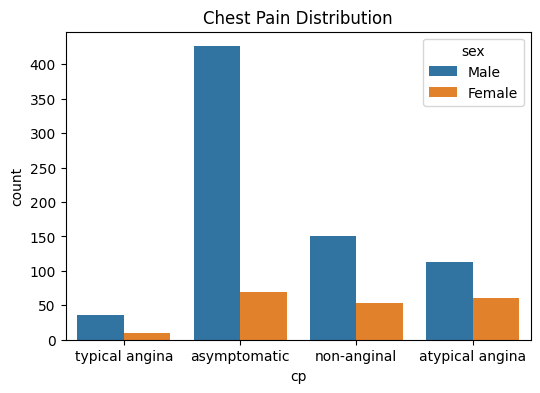

In [153]:
# count plot of cp column grouped by sex column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='sex')
plt.title('Chest Pain Distribution')
plt.show()

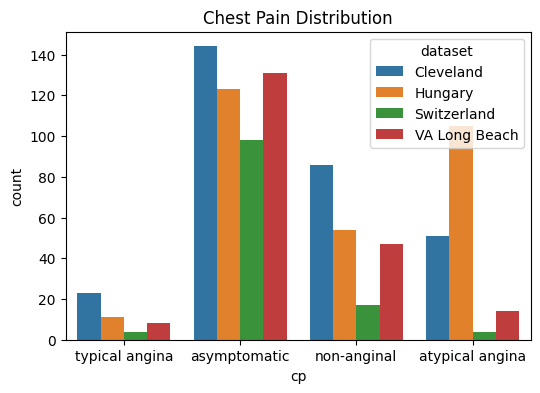

In [154]:
# count plot of cp column grouped by dataset column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='dataset')
plt.title('Chest Pain Distribution')
plt.show()

In [155]:
# at what age the chest pain is more common
df.groupby('cp')['age'].mean()

cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64

#### Let's explore the trestbps column

The normal resting blood pressure is 120/80 mmHg.

- If the resting blood pressure is less than 120/80 mmHg then it is considered as low blood pressure. it can reduce the amount of blood flow to your brain, which can cause dizziness, lightheadedness, or even fainting. In severe cases, low blood pressure can be life-threatening.

- If the resting blood pressure is more than 120/80 mmHg then it is considered as high blood pressure. High blood pressure can cause hardening and thickening of the arteries (atherosclerosis), which can lead to a heart attack, stroke or other complications.

In [156]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

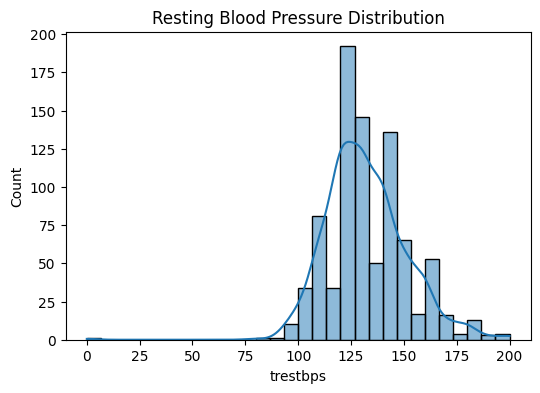

In [157]:
# create a histplot of trestbps column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='trestbps', bins=30, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

- According to this dataset, the resting blood pressure of is distributed within the rang of 100 to 200. The mean resting blood pressure is 132.13 mmHg, and the minimum 0 and the maximum is 200.\
- Normal blood pressure reading is 120/80 mm Hg or lower. Values above this might indicate elevated blood pressure (prehypertension) or hypertension, while values lower than 90/60 mm Hg might indicate hypotension.

In [158]:
df['trestbps'].value_counts().sum()

861

In [159]:
df['trestbps'].isnull().sum()

59

It means there are 59 missing values in the trestbps column.

In [160]:
print(f"Percentage of missing values in the trestbps column is {(df['trestbps'].isnull().sum() / len(df)) * 100:.2f}%")

Percentage of missing values in the trestbps column is 6.41%


In [161]:
# impiute missing values in the trestbps column using IterativeImputer
imputer = IterativeImputer()
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

# print the missing values in the trestbps column
print("Missing values in trestbps column:", df['trestbps'].isnull().sum())


Missing values in trestbps column: 0


In [162]:
# Let's impute other columns missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [164]:
# impute the missing values of numeric columns in the dataset using IterativeImputer and save for inverse transform
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])

In [165]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

#### Let's explore the thal column

In [166]:
df['thal'].value_counts().sum()

434

In [167]:
missing_perc = (df['thal'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in the thal column is {missing_perc:.2f}%")

Percentage of missing values in the thal column is 52.83%


### Imputation of missing values

Now it's being necessary to impute the missing values of the dataset as there were no missing values in the first 5 columns

In [168]:
df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
thalch        0
oldpeak       0
ca            0
num           0
dtype: int64

In [169]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [170]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [171]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# define the function to impute the missing values in categorical columns
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y.astype(str))

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

# Impute missing values for all categorical columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = impute_categorical_missing_data(col)


The feature 'fbs' has been imputed with 79.52 accuracy



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'restecg' has been imputed with 65.22 accuracy



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'exang' has been imputed with 79.77 accuracy



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'slope' has been imputed with 67.48 accuracy



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'thal' has been imputed with 72.41 accuracy



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_1320\3887051054.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
# check for null values
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Outputs
1. The minimum age of getting heart disease is 28 years.
2. There are 603 out of 920 (65%) patients with heart disease who are older than 50 years. 
3. The maximum number of patients with heart disease are between 40 to 65 years old.
4. We have highest number of patients from Cleveland (304) and lowest from Switzerland (123).
    * The highest number of male heart patients are from Hungary (212) and the lowest are from Switzerland (113).
    * The highest number of female heart patients are from Cleveland (97) and the lowest are from VA long beach (6).
5. The mean, median and mode of the dataset is approximately same with a little bit of difference.
6. The chest pain type 4 (asymptomatic) is the most common type of chest pain in heart patients and the chest pain type 1 (typical angina) is the least common type of chest pain in heart patients.
7. The chest pain is more common among the patients of age 48-55 years.